# Projet numérique : choix du pas de temps

#### Anisse Id-Benaddi & Simon Leconte

Nous utilisons des schémas convergeants pour approximer les solutions d'équations différentielles que nous ne parvenons pas à résoudre formellement. Ces méthodes dépendent d'un pas de temps $\Delta t_j$. L'objectif de ce projet est d'évaluer la précision de schémas numériques, en particulier, nous chercherons à déterminer comment choisir $\Delta t_j$

## Pas fixe

Nous allons dans un premier temps comparer l'efficacité d'un schéma numérique d'ordre 1, celui d'Euler explicite, et d'un schéma d'ordre 2, celui de Heun.

Voici une implémentation possible de ces deux schémas :

In [1]:
from math import *
import matplotlib.pyplot as plt
import numpy as np

NB_ITER = 10
DT = 0.1

def solve_euler_explicit(f,x0,dt,nb_iter):
    x=[x0[0]]
    t=[x0[1]]
    for i in range(nb_iter):
        t.append(t[-1]+dt)
        x.append(x[-1]+f(t[-2],x[-1])*dt)
    return x,t

def solve_heun(f,x0,dt,nb_iter):
    x=[x0[0]]
    t=[x0[1]]
    for i in range(nb_iter):
        t.append(t[-1]+dt)
        x1 = x[-1]+(dt/2)*(f(t[-2],x[-1])+f(t[-1],x[-1]+dt*f(t[-2],x[-1])))
        x.append(x1)
    return x,t

Comparons l'efficacité de ces deux méthodes sur une équation différentielle que nous savons résoudre : $\dfrac{dy}{dt}(t) - y(t) = 0$. Nous prendrons la condition initiale $y(0)=1$ pour retrouver la fonction $y : x \mapsto \exp x$. Nous avons pour cette équation $f : (t,x) \mapsto x$.

In [2]:
def f(t,x):
    return x

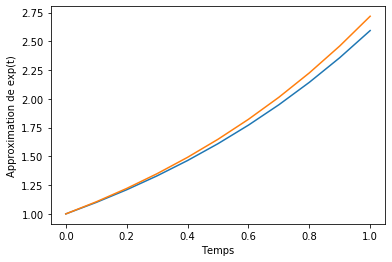

In [3]:
plt.clf()
x,t=solve_euler_explicit(f,(1,0),DT,NB_ITER)
plt.plot(t,x)
plt.plot(t,[exp(x) for x in t])
plt.xlabel("Temps")
plt.ylabel("Approximation de exp(t)")
plt.show()

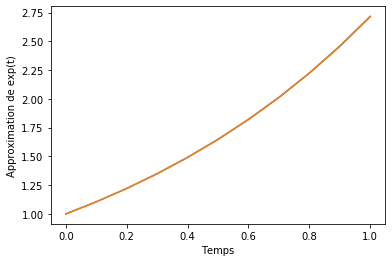

In [4]:
plt.clf()
x,t=solve_heun(f,(1,0),DT,NB_ITER)
plt.plot(t,x)
plt.plot(t,[exp(x) for x in t])
plt.xlabel("Temps")
plt.ylabel("Approximation de exp(t)")
plt.show()

Nous observons qu'avec un pas élevé, le schéma d'ordre 1 donne rapidement une mauvaise approximation : l'erreur est visible. Sur le schéma d'ordre 2, l'approximation n'est pas visible.

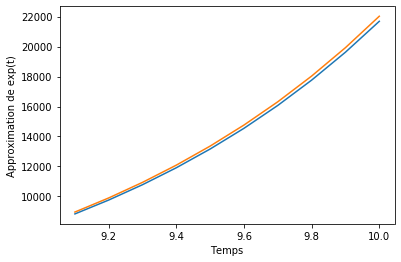

In [5]:
plt.clf()
x,t=solve_heun(f,(1,0),DT,100)
plt.plot(t[-10:],x[-10:])
plt.plot(t[-10:],[exp(x) for x in t][-10:])
plt.xlabel("Temps")
plt.ylabel("Approximation de exp(t)")
plt.show()

Cependant, le schéma d'ordre 2 donne également une erreur visible au bout d'un temps plus important. Remarquons que le pas choisi est ici élevé : 0.1

À présent, évaluons l'erreur dans les deux cas.

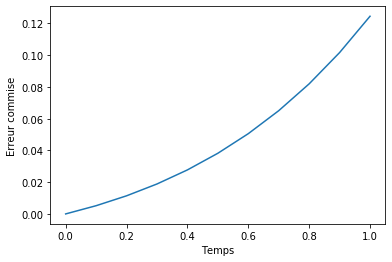

In [6]:
plt.clf()
x,t=solve_euler_explicit(f,(1,0),DT,NB_ITER)
err = np.exp(np.array(t))-np.array(x)
plt.plot(t,err)
plt.xlabel("Temps")
plt.ylabel("Erreur commise")
plt.show()

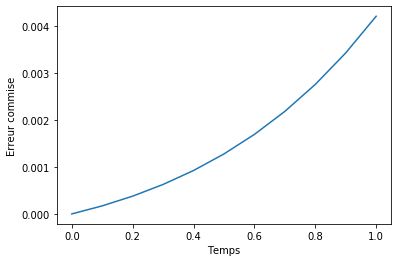

In [7]:
plt.clf()
x,t=solve_heun(f,(1,0),DT,NB_ITER)
err = np.exp(np.array(t))-np.array(x)
plt.plot(t,err)
plt.xlabel("Temps")
plt.ylabel("Erreur commise")
plt.show()

Dans un cas comme dans l'autre, l'erreur est exponentielle, mais avec le schéma de Heun, nous améliorons la précision du schéma d'un facteur 30.

L'erreur commise étant la plus importante pour les valeurs de $t$ les plus grandes, nous utiliserons la valeur obtenue en $t=1$ avec différentes valeurs de pas, pour mettre en évidence l'ordre de convergence de chaque schéma.

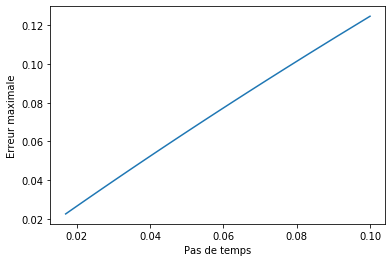

In [8]:
l_dt=[1/(i+10) for i in range(50)]
n=len(l_dt)
err_euler_explicit = [np.exp(1)-solve_euler_explicit(f,(1,0),l_dt[i],int(1/l_dt[i]))[0][-1] for i in range(n)]
plt.plot(l_dt,err_euler_explicit)
plt.xlabel("Pas de temps")
plt.ylabel("Erreur maximale")
plt.show()

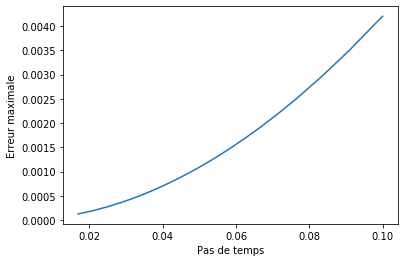

In [9]:
l_dt=[1/(i+10) for i in range(50)]
n=len(l_dt)
err_heun = [np.exp(1)-solve_heun(f,(1,0),l_dt[i],int(1/l_dt[i]))[0][-1] for i in range(n)]
plt.plot(l_dt,err_heun)
plt.xlabel("Pas de temps")
plt.ylabel("Erreur maximale")
plt.show()

Nous observons pour le schéma d'ordre 1 que l'erreur est majorée par une une fonction affine du pas de temps, tandis que pour le schéma d'ordre 2, l'erreur est majorée par une fonction quadratique du pas de temps. Ce qui correspond bien aux ordres de convergeance de chaque schéma.

## Adaptation du pas de temps

#### Démonstration de $||e^{j+1}||=\Delta t_j \dfrac{||f(t_{j+1},x^{j+1})-f(t_j,x^j)||}{2} + O(\Delta t_j^3)$

Nous allons montrer que $||e^{j+1}||=\Delta t_j \dfrac{||f(t_{j+1},x^{j+1})-f(t_j,x^j)||}{2} + O(\Delta t_j^3)$ dans le cas du schéma d'euler explicite, lorsque $f$ est de classe $C^1$.

Calculons pour cela : $ e^{j+1} - \Delta t_j \dfrac{f(t_{j+1},x^{j+1})-f(t_j,x^j)}{2}$

Par définition : $e^{j+1} = x^j + \int^{t_{j+1}}_{t_j} f(s,x(s)) ds - x^{j+1}$ et le schéma d'Euler nous donne $x^{j+1}-x^j=\Delta t_j f(t_j,x^j)$

Ainsi, nous obtenons : $e^{j+1} - \Delta t_j \dfrac{f(t_{j+1},x^{j+1})-f(t_j,x^j)}{2} = \int^{t_{j+1}}_{t_j} f(s,x(s)) ds - \Delta t_j \dfrac{f(t_{j+1},x^{j+1})+f(t_j,x^j)}{2}$ Appelons cette équation (1)

Intéressons nous au terme $\int^{t_{j+1}}_{t_j} f(s,x(s)) ds$

Un développement à l'ordre 2 nous donne : $\int^{t_{j+1}}_{t_j} f(s,x(s)) = \Delta t_j \dot x(t_j) + \dfrac{\Delta t^2}{2} \ddot x(t_j) + O(\Delta t_j^3)$, que l'on peut réécrire : $\int^{t_{j+1}}_{t_j} f(s,x(s)) = \Delta t_j \dot x(t_j) + \dfrac{\Delta t^2}{2} (f(t_j,x(t_j)+\Delta t_j \ddot x (t_j))$

Or on sait (d'après l'exercice Consistance et ordre de schémas du poly) que $f(t_{j+1},x(t_j)+\Delta tf(t_j,x(t_j))) = f(t_j,x(t_j) + \Delta t(\partial_t f(t_j,x(t_j))+\partial_xf(t_j,x(t_j))f(t_j,x(t_j))) + O(\Delta t^2)$ avec $\ddot x(t_j) = \partial_t f(t_j,x(t_j))+\partial_xf(t_j,x(t_j))f(t_j,x(t_j))$

D'où $\int^{t_{j+1}}_{t_j} f(s,x(s)) = \dfrac{\Delta t_j}{2} f(t_j,x(t_j)) + \dfrac{\Delta t_j}{2} f(t_{j+1},x(t_j)+\Delta t_j f(t_j,x(t_j))) + O(\Delta t^3)$

Soit $\int^{t_{j+1}}_{t_j} f(s,x(s)) = \dfrac{\Delta t_j}{2} (f(t_j,x(t_j)) + f(t_{j+1},x(t_j)+\Delta t_j f(t_j,x(t_j)))) + O(\Delta t^3)$

En réinjectant cela dans (1), il reste à montrer que $f(t_{j+1},x(t_j)+\Delta t_j f(t_j,x(t_j))) = f(t_{j+1},x^{j+1}) + O(\Delta t^2)$

En effectuant un développement à l'ordre 1 : $f(t_{j+1},x(t_j)+\Delta t_j f(t_j,x(t_j))) = f(t_{j+1},x^{j+1})+0+\dfrac{\partial f}{\partial x}(t_{j+1},x^{j+1})(x(t_j)+\Delta t_j f(t_j,x(t_j))-x^{j+1}) + O(\Delta t^2)$

Il suffit de montrer que $x(t_j)+\Delta t_j f(t_j,x(t_j))-x^{j+1} = O(\Delta t^2)$

Et $x(t_j)+\Delta t_j f(t_j,x(t_j))-x^{j+1} = \Delta t_j (f(t_j,x(t_j))-f(t_j,x^j))$

Il ne reste donc plus qu'à montrer que $f(t_j,x(t_j))-f(t_j,x^j) = O(\Delta t)$

Ce qui est vrai puisque $f(t_j,x(t_j)) = f(t_j,x^j) + (x^j-x(t_j)) \dfrac{\partial f}{\partial x}(t_j,x^j) + O(\Delta t^2)$ et que l'on a bien $x^j-x(t_j) = O(\Delta t)$

Nous avons bien montré que $||e^{j+1}||=\Delta t_j \dfrac{||f(t_{j+1},x^{j+1})-f(t_j,x^j)||}{2} + O(\Delta t_j^3)$

#### Démonstration de $e^{j+1} = O(\Delta t_j^2)$

Un développement donne : 

$f(t_{j+1},x^{j+1}) - f(t_j,x^j) = \partial_t f(t_j,x^j) \Delta t_j + \partial_x f(t_j,x^j) f(t_j,x^j) \Delta t_j + O(\Delta t_j^2)$

En posant $C_j = || \partial_t f(t_j,x^j) + \partial_x f(t_j,x^j) f(t_j,x^j) ||$ on obtient :

$f(t_{j+1},x^{j+1}) - f(t_j,x^j) = C_j \Delta t_j + O(\Delta t_j^2)$

Donc $||f(t_{j+1},x^{j+1}) - f(t_j,x^j)|| = O(\Delta t_j)$

Enfin, d'après la question précédente, $||e^{j+1}||=\Delta t_j \dfrac{||f(t_{j+1},x^{j+1})-f(t_j,x^j)||}{2} + O(\Delta t_j^3)$ donc $||e^{j+1}|| = O(\Delta t_j^2)$

#### Une stratégie d'adaptation

Nous allons montrer au cours de cette partie qu'une possibilité est de faire varier le pas de temps de manière à ce que $\Delta t_{new} = \Delta t \sqrt{\dfrac{Tol_{abs}}{||e^{j+1}||}}$

On a $||e^{j+1}|| \approx \dfrac{C_j}{2} \Delta t_j^2$ puisque $||e^{j+1}||=C_j \dfrac{\Delta t_j^2}{2} + O(\Delta t_j^3)$

De même on a : $||e^{j+2}|| \approx \dfrac{C_{j+1}}{2} \Delta t_{j+1}^2$

Et sous réserve d'une régularité suffisante de $f$, on a $C_{j+1} \approx C_j$, $C_j$ étant fonction des dérivées partielles de $f$.

Alors $\dfrac{||e^{j+1}||}{\Delta t_j^2} \approx \dfrac{||e^{j+2}||}{\Delta t^2_{j+1}}$

Rappelons que dans ce cas nous prenons $\Delta t_j =\Delta t$ et $\Delta t_{j+1} = \Delta t_{new}$.

Le pire des cas correspond à $||e^{j+2}|| = Tol_{abs}$

Nous obtenons alors $\dfrac{||e^{j+1}||}{\Delta t^2} \approx \dfrac{Tol_{abs}}{\Delta t^2_{new}}$

Enfin : $\Delta t_{new} = \Delta t \sqrt{\dfrac{Tol_{abs}}{||e^{j+1}||}}$

Cette formule permet d'adapter le pas de façon à avoir un compromis entre la complexité de calcul, et la taille du pas, qui induit une approximation. Pour éviter d'avoir des valeurs de $\Delta t_{new}$ aberrantes, nous imposerons $dtmin \le \Delta t_{new} \le dtmax$ comme marge de sécurité. Nous pourrions avoir des valeurs aberrantes lorsque $||e^{j+1}||$ est très petit.

#### Implémentation

La fonction suivante, issue du projet boisgera/CDIS (https://github.com/boisgera/CDIS), permet d'implémenter cette méthode.

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from numpy import *
from scipy.integrate import solve_ivp
import matplotlib; 
from matplotlib.pyplot import *
import seaborn as sns
sns.set()

def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)
            x_back = x_next - dt * f(x_next)
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        ts = vstack([ts,t_next])
        xs = vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T)

Cette fonction prend en entrée la fonction $f$ vérifiant $\dot x = f(x)$, les conditions initiales du problèmes $(t_0,x_0)$, un horizon de temps $t_f$ jusqu'auquel approcher la solution de l'équation différentiel, ainsi que les bornes pour un $\Delta t$ acceptable et la valeur de $Tol_{abs}$.

Nous commençons par fixer un premier pas de temps $dt$ ayant une valeur intermédiaire entre $dt_{min}$ et $dt_{max}$ et nous initialisons les vecteurs contenant les solutions avec les conditions initiales. Le temps $t_i$ entre le précédent point sauvegardé et le point actuel est initialisée à 0 et $x$ est initialisé à $x_0$.

Pour passer d'un point au suivant, nous utilisons le schéma d'Euler avec le $dt$ déjà calculé, en mettant à jour les valeurs de $t$ et $t_i$. Arrivé au point suivant, pour pouvoir évaluer l'erreur effectuée, on calcule, à partir du nouveau point, le point duquel on semble provenir par le schéma d'Euler. Nous appelons ce point $x_{back}$. Nous calculons ensuite le nouveau $dt$ grâce à la formule $\Delta t_{new} = \Delta t \sqrt{\dfrac{Tol_{abs}}{||e^{j+1}||}}$, en se laissant une marge d'erreur grâce au coefficient 0.9 permettant de rendre le pas un peu plus petit.

Si la valeur de $dt$ obtenue est plus faible que $dt_{min}$ cela signifie que l'erreur commise est trop grande et que notre schéma ne permet plus d'obtenir une bonne approximation de la solution, dans ce cas, nous levons une erreur et arrêtons le programme.

Si au contraire, $dt > \dfrac{dt_{max}}{2}$, $dt$ devient trop grand et pour garantir au programme de pouvoir avancer, nous réduisons $dt$ à $\dfrac{dt_{max}}{2}$

Nous retenons enfin les valeurs précédemment calculées pour la prochaine itération.

Nous répétons ce processus jusqu'à ce que l'on ait avancé d'un temps au moins égal à $dt_{max}$, de façon à limiter la taille de ce que nous stockons en mémoire. Nous n'avons donc au cours de ces itération, rien stocké de plus en mémoire !

Lorsque nous avançons d'au moins $dt_{max}$